## EDA

**Karina Huang, Lipika Ramaswamy**

**Apr 28, 2019**

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#load data
rawData = pd.read_csv('data/compas-scores-raw.csv')
#check data frame
rawData.head()

,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,...,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted
0,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,7,Risk of Violence,-2.08,4,Low,New,1,0
1,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,8,Risk of Recidivism,-1.06,2,Low,New,1,0
2,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,18,Risk of Failure to Appear,15.00,1,Low,New,1,0
3,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,...,1,Low,7,Risk of Violence,-2.84,2,Low,New,1,0
4,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,...,1,Low,8,Risk of Recidivism,-1.50,1,Low,New,1,0


In [3]:
#check missing values
rawData.isna().sum()

Person_ID                      0
AssessmentID                   0
Case_ID                        0
Agency_Text                    0
LastName                       0
FirstName                      0
MiddleName                 45195
Sex_Code_Text                  0
Ethnic_Code_Text               0
DateOfBirth                    0
ScaleSet_ID                    0
ScaleSet                       0
AssessmentReason               0
Language                       0
LegalStatus                    0
CustodyStatus                  0
MaritalStatus                  0
Screening_Date                 0
RecSupervisionLevel            0
RecSupervisionLevelText        0
Scale_ID                       0
DisplayText                    0
RawScore                       0
DecileScore                    0
ScoreText                     45
AssessmentType                 0
IsCompleted                    0
IsDeleted                      0
dtype: int64

In [4]:
#compas score types
rawData.DisplayText.value_counts()

Risk of Failure to Appear    20281
Risk of Recidivism           20281
Risk of Violence             20281
Name: DisplayText, dtype: int64

In [5]:
#ethnicity
rawData.Ethnic_Code_Text.value_counts()

African-American    27018
Caucasian           21783
Hispanic             8742
Other                2592
Asian                 324
Native American       219
Arabic                 75
African-Am             51
Oriental               39
Name: Ethnic_Code_Text, dtype: int64

In [6]:
#recode ethnicity column
rawData.Ethnic_Code_Text = rawData.Ethnic_Code_Text.apply(lambda x: 'African-American' if x == 'African-Am' else x)

In [7]:
#sex
rawData.Sex_Code_Text.value_counts()

Male      47514
Female    13329
Name: Sex_Code_Text, dtype: int64

In [9]:
#drop observations with -1 Decile scores
rawData = rawData[rawData.DecileScore >= 0]

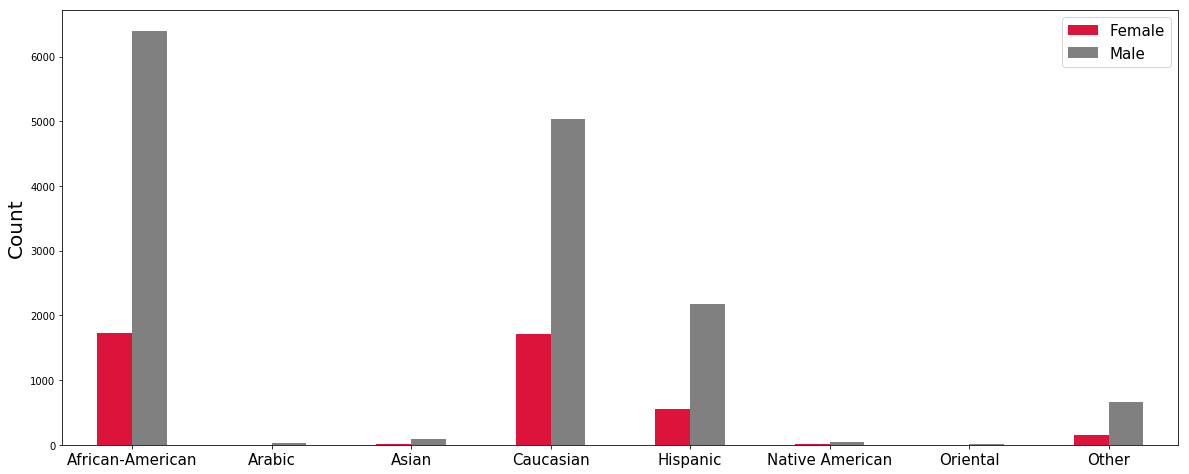

In [10]:
#get unique individuals in dataset
ind = rawData.drop_duplicates(subset = ['Person_ID']) 

#group by ethnicity and sex
demog = ind.groupby(['Ethnic_Code_Text', 'Sex_Code_Text']).agg({
    'Person_ID': len
}).unstack()

#visualize demographics
fig, ax = plt.subplots(figsize = (20, 8))
demog.plot(ax = ax, kind = 'bar', color = ['crimson', 'gray'])
ax.set_xticklabels(labels = demog.index, rotation = 360, fontsize = 15)
ax.set_xlabel('')
ax.set_ylabel('Count', fontsize = 20)
ax.legend(['Female', 'Male'], fontsize = 15)
plt.show()

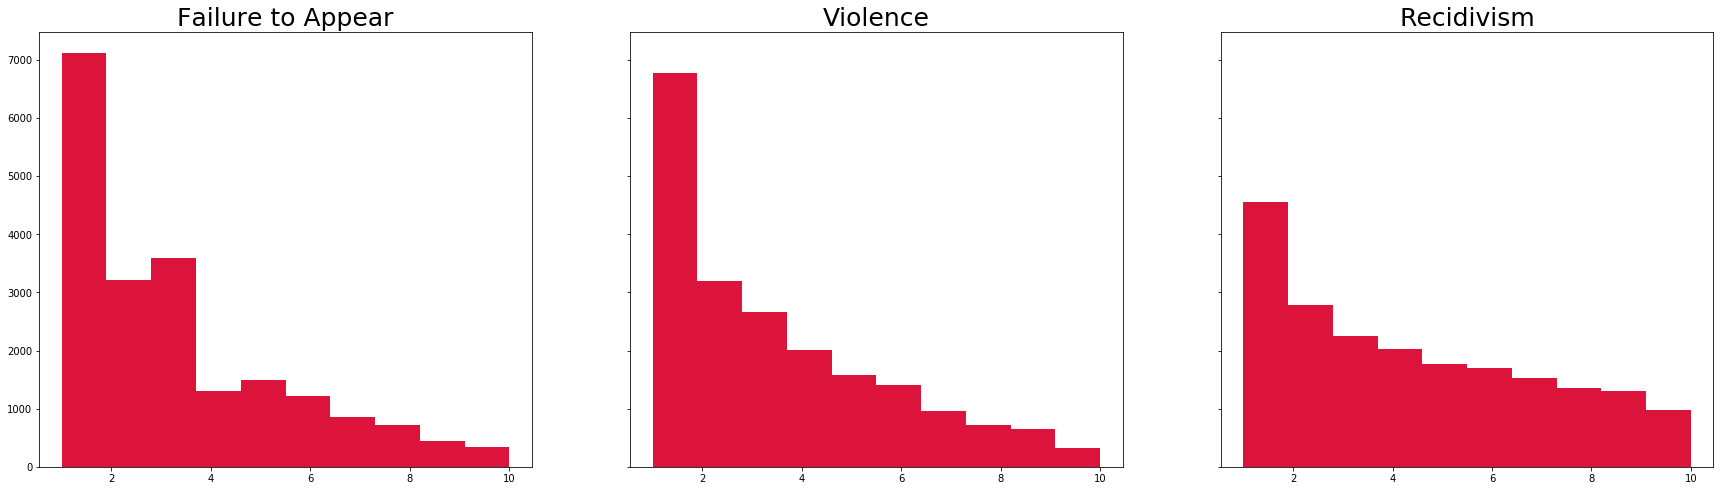

In [14]:
#subset data by score type
fta = rawData[rawData.DisplayText == 'Risk of Failure to Appear']
violence = rawData[rawData.DisplayText == 'Risk of Violence']
recidivism = rawData[rawData.DisplayText == 'Risk of Recidivism']

#visualize distribution of decile score
dfs = [fta, violence, recidivism]
labels = ['Failure to Appear', 'Violence', 'Recidivism']
fig, axes = plt.subplots(1, 3, figsize = (30, 8), sharex = True, sharey = True)
for i, ax in enumerate(axes.flat):
    ax.hist(dfs[i]['DecileScore'], color = 'crimson')
    ax.set_title(labels[i], fontsize = 25)
plt.show()

In [15]:
rawData.shape

(60798, 28)